# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import pandas as pd
import numpy as np

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160474 entries, 0 to 160473
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        160474 non-null  float64
 1   lng        160474 non-null  float64
 2   desc       160474 non-null  object 
 3   zip        140500 non-null  float64
 4   title      160474 non-null  object 
 5   timeStamp  160474 non-null  object 
 6   twp        160423 non-null  object 
 7   addr       160474 non-null  object 
 8   e          160474 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 11.0+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head(5)

19401.0    11124
19464.0    10794
19403.0     7989
19446.0     7701
19406.0     5218
Name: zip, dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    13750
ABINGTON         9724
NORRISTOWN       9361
UPPER MERION     8366
CHELTENHAM       7379
Name: twp, dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
df['title'].nunique()

120

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(": ")[0])
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
160469,40.081260,-75.137025,RT309 EXPY & S EASTON RD UNDERPASS; CHELTENHAM...,NaN,Traffic: DISABLED VEHICLE -,2017-01-27 16:40:24,CHELTENHAM,RT309 EXPY & S EASTON RD UNDERPASS,1,Traffic
160470,40.108224,-75.144142,JENKINTOWN RD & BRIARWOOD RD; ABINGTON; 2017-0...,19038.0,Traffic: ROAD OBSTRUCTION -,2017-01-27 16:28:16,ABINGTON,JENKINTOWN RD & BRIARWOOD RD,1,Traffic
160471,40.388907,-75.448378,FINLAND RD & BRINCKMAN RD; MARLBOROUGH; Stati...,18073.0,EMS: ABDOMINAL PAINS,2017-01-27 16:45:50,MARLBOROUGH,FINLAND RD & BRINCKMAN RD,1,EMS
160472,40.124360,-75.381553,BRANDON RD & S SCHUYLKILL AVE; WEST NORRITON;...,19403.0,EMS: ALTERED MENTAL STATUS,2017-01-27 16:43:40,WEST NORRITON,BRANDON RD & S SCHUYLKILL AVE,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [10]:
df['Reason'].value_counts()

EMS        79292
Traffic    57043
Fire       24139
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

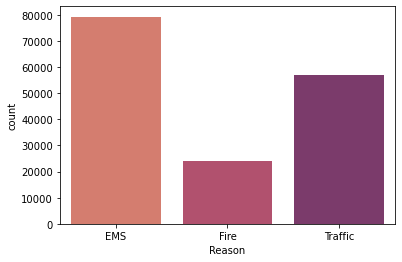

In [11]:
sns.countplot(x='Reason',data=df,palette='flare')

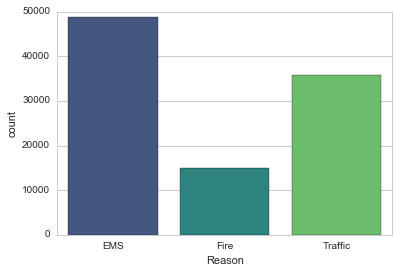

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [12]:
df['timeStamp'].dtypes

dtype('O')

In [13]:
type(df['timeStamp'])

pandas.core.series.Series

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'][0]

Timestamp('2015-12-10 17:10:52')

In [17]:
time = df['timeStamp'].iloc[0]
time.hour

17

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [18]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['WeekDay'] = df['timeStamp'].apply(lambda x: x.weekday())
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,WeekDay
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160469,40.081260,-75.137025,RT309 EXPY & S EASTON RD UNDERPASS; CHELTENHAM...,NaN,Traffic: DISABLED VEHICLE -,2017-01-27 16:40:24,CHELTENHAM,RT309 EXPY & S EASTON RD UNDERPASS,1,Traffic,16,1,4
160470,40.108224,-75.144142,JENKINTOWN RD & BRIARWOOD RD; ABINGTON; 2017-0...,19038.0,Traffic: ROAD OBSTRUCTION -,2017-01-27 16:28:16,ABINGTON,JENKINTOWN RD & BRIARWOOD RD,1,Traffic,16,1,4
160471,40.388907,-75.448378,FINLAND RD & BRINCKMAN RD; MARLBOROUGH; Stati...,18073.0,EMS: ABDOMINAL PAINS,2017-01-27 16:45:50,MARLBOROUGH,FINLAND RD & BRINCKMAN RD,1,EMS,16,1,4
160472,40.124360,-75.381553,BRANDON RD & S SCHUYLKILL AVE; WEST NORRITON;...,19403.0,EMS: ALTERED MENTAL STATUS,2017-01-27 16:43:40,WEST NORRITON,BRANDON RD & S SCHUYLKILL AVE,1,EMS,16,1,4


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [20]:
df['WeekDay'] = df['WeekDay'].map(dmap)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,WeekDay
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160469,40.081260,-75.137025,RT309 EXPY & S EASTON RD UNDERPASS; CHELTENHAM...,NaN,Traffic: DISABLED VEHICLE -,2017-01-27 16:40:24,CHELTENHAM,RT309 EXPY & S EASTON RD UNDERPASS,1,Traffic,16,1,Fri
160470,40.108224,-75.144142,JENKINTOWN RD & BRIARWOOD RD; ABINGTON; 2017-0...,19038.0,Traffic: ROAD OBSTRUCTION -,2017-01-27 16:28:16,ABINGTON,JENKINTOWN RD & BRIARWOOD RD,1,Traffic,16,1,Fri
160471,40.388907,-75.448378,FINLAND RD & BRINCKMAN RD; MARLBOROUGH; Stati...,18073.0,EMS: ABDOMINAL PAINS,2017-01-27 16:45:50,MARLBOROUGH,FINLAND RD & BRINCKMAN RD,1,EMS,16,1,Fri
160472,40.124360,-75.381553,BRANDON RD & S SCHUYLKILL AVE; WEST NORRITON;...,19403.0,EMS: ALTERED MENTAL STATUS,2017-01-27 16:43:40,WEST NORRITON,BRANDON RD & S SCHUYLKILL AVE,1,EMS,16,1,Fri


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

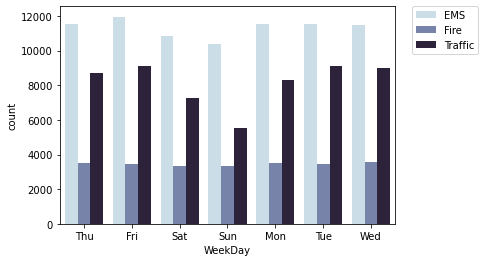

In [21]:
sns.countplot(x='WeekDay',data=df,hue='Reason',palette = "ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

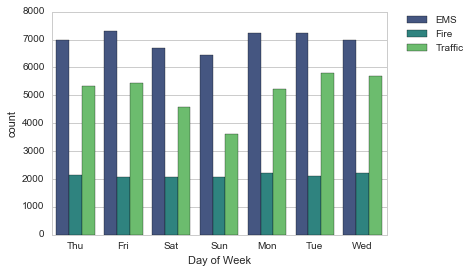

**Now do the same for Month:**

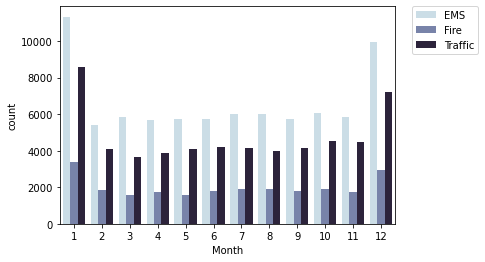

In [22]:
sns.countplot(x='Month',data=df,hue='Reason',palette = "ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

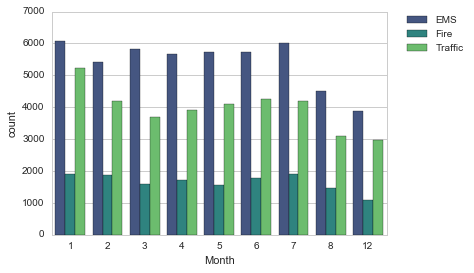

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [23]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,WeekDay
Month,,,,,,,,,,,,
1,23294,23294,23294,20615,23294,23294,23289,23294,23294,23294,23294,23294
2,11396,11396,11396,9926,11396,11396,11395,11396,11396,11396,11396,11396
3,11059,11059,11059,9754,11059,11059,11052,11059,11059,11059,11059,11059
4,11287,11287,11287,9897,11287,11287,11284,11287,11287,11287,11287,11287
5,11374,11374,11374,9938,11374,11374,11371,11374,11374,11374,11374,11374


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

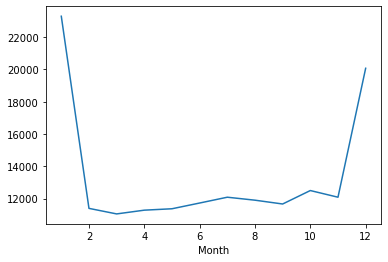

In [24]:
byMonth['twp'].plot()

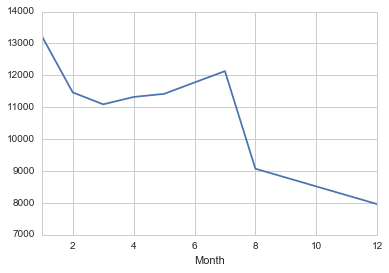

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

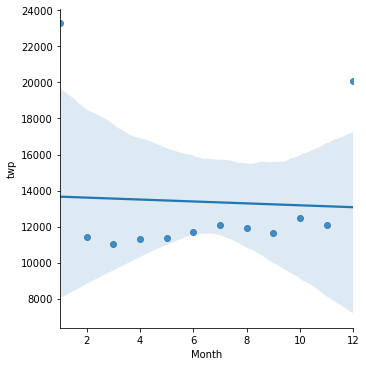

In [25]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

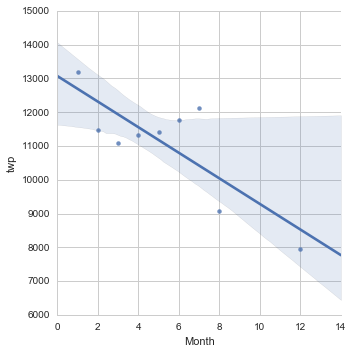

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [26]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,WeekDay,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160469,40.081260,-75.137025,RT309 EXPY & S EASTON RD UNDERPASS; CHELTENHAM...,NaN,Traffic: DISABLED VEHICLE -,2017-01-27 16:40:24,CHELTENHAM,RT309 EXPY & S EASTON RD UNDERPASS,1,Traffic,16,1,Fri,2017-01-27
160470,40.108224,-75.144142,JENKINTOWN RD & BRIARWOOD RD; ABINGTON; 2017-0...,19038.0,Traffic: ROAD OBSTRUCTION -,2017-01-27 16:28:16,ABINGTON,JENKINTOWN RD & BRIARWOOD RD,1,Traffic,16,1,Fri,2017-01-27
160471,40.388907,-75.448378,FINLAND RD & BRINCKMAN RD; MARLBOROUGH; Stati...,18073.0,EMS: ABDOMINAL PAINS,2017-01-27 16:45:50,MARLBOROUGH,FINLAND RD & BRINCKMAN RD,1,EMS,16,1,Fri,2017-01-27
160472,40.124360,-75.381553,BRANDON RD & S SCHUYLKILL AVE; WEST NORRITON;...,19403.0,EMS: ALTERED MENTAL STATUS,2017-01-27 16:43:40,WEST NORRITON,BRANDON RD & S SCHUYLKILL AVE,1,EMS,16,1,Fri,2017-01-27


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

<AxesSubplot:xlabel='Date'>

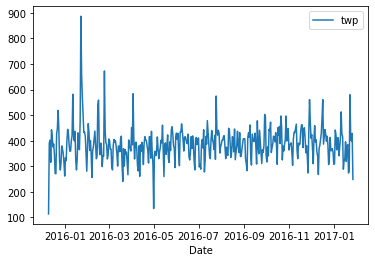

In [27]:
df[['Date','twp']].groupby('Date').count().plot()

<AxesSubplot:xlabel='Date'>

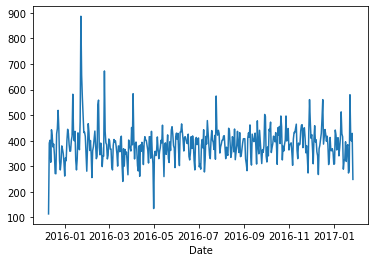

In [28]:
df.groupby('Date').count()['twp'].plot()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

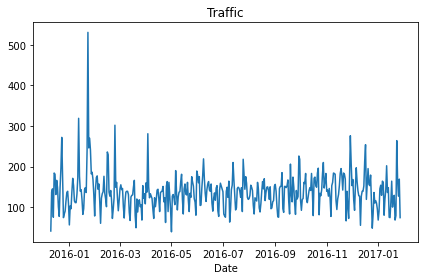

In [29]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

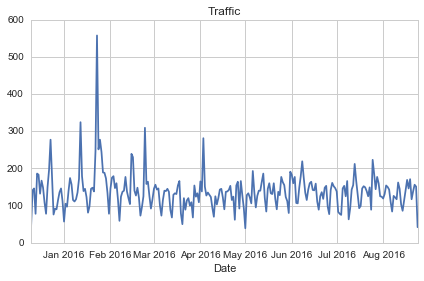

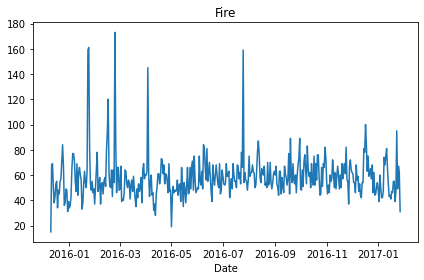

In [30]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

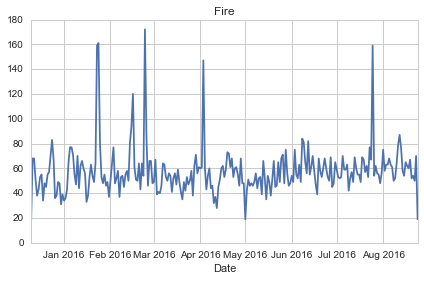

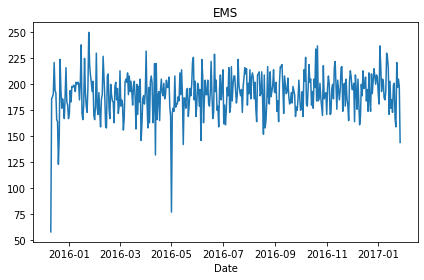

In [31]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

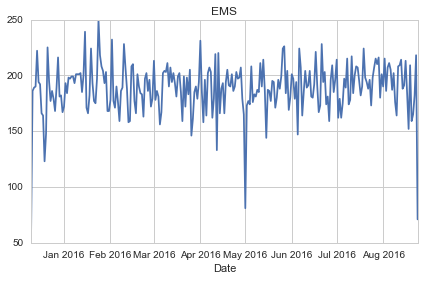

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [32]:
weekday_per_hour = df.groupby(['WeekDay','Hour']).count()['twp'].unstack()
weekday_per_hour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
WeekDay,,,,,,,,,,,,,,,,,,,,,
Fri,433,382,342,324,302,360,673,1056,1210,1268,...,1496,1620,1655,1665,1281,1196,1055,938,853,703
Mon,435,334,334,293,327,401,644,1088,1364,1338,...,1363,1507,1533,1600,1379,1144,963,757,701,506
Sat,572,482,420,396,367,380,426,601,762,1047,...,1263,1263,1249,1269,1189,1186,956,884,785,765
Sun,594,521,477,435,367,396,446,609,750,970,...,1109,1085,1079,1130,1124,1036,850,751,599,541
Thu,445,321,352,282,295,368,663,1073,1309,1391,...,1430,1553,1489,1698,1360,1137,996,874,691,577


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='WeekDay'>

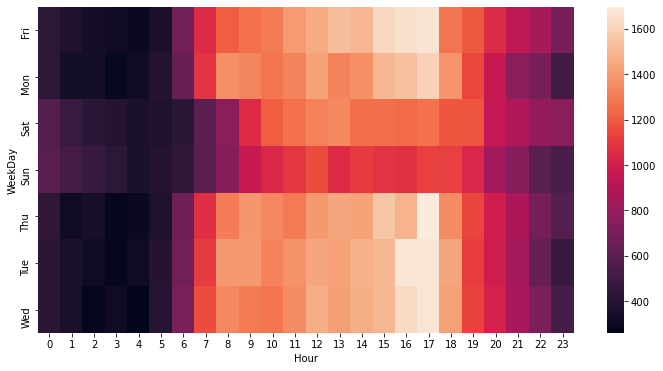

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(weekday_per_hour)

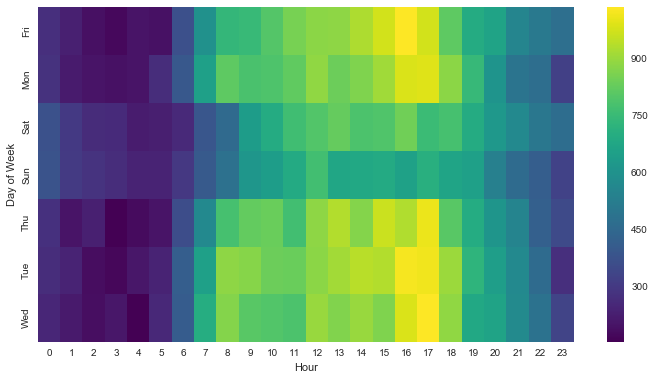

** Now create a clustermap using this DataFrame. **

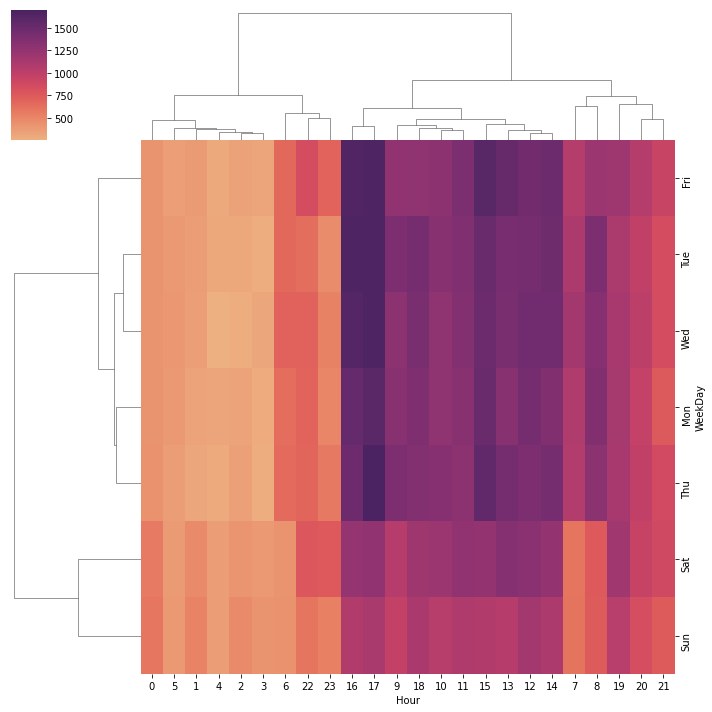

In [34]:
sns.clustermap(weekday_per_hour,cmap='flare')

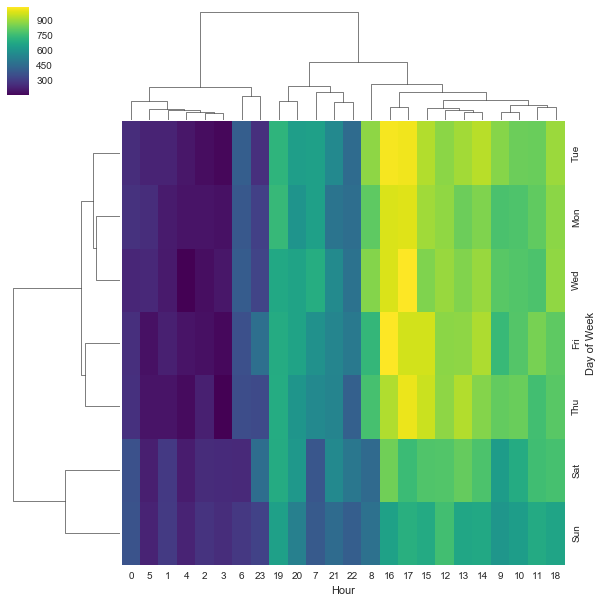

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [35]:
months_per_hour = df.groupby(['WeekDay','Month']).count()['twp'].unstack()
months_per_hour

Month,1,2,3,4,5,6,7,8,9,10,11,12
WeekDay,,,,,,,,,,,,
Fri,3411,1564,1519,1949,1725,1647,2042,1740,2194,1899,1699,3114
Mon,3310,1959,1533,1593,1776,1609,1685,1864,1552,2042,1681,2775
Sat,3227,1434,1262,1734,1438,1376,1691,1423,1405,1935,1515,2974
Sun,3202,1223,1095,1486,1411,1328,1667,1360,1235,1757,1281,2176
Thu,3182,1582,1883,1592,1585,2055,1642,1578,2164,1625,1627,3263
Tue,3622,1743,1871,1421,1903,1669,1650,1993,1559,1542,2193,2931
Wed,3335,1890,1889,1509,1533,2042,1709,1944,1557,1699,2090,2834


Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='WeekDay'>

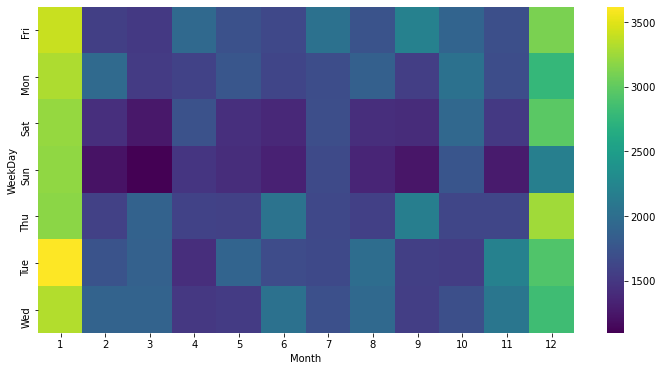

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(months_per_hour,cmap='viridis')

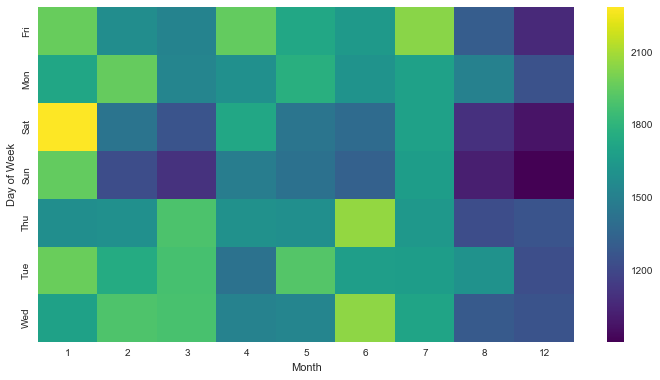

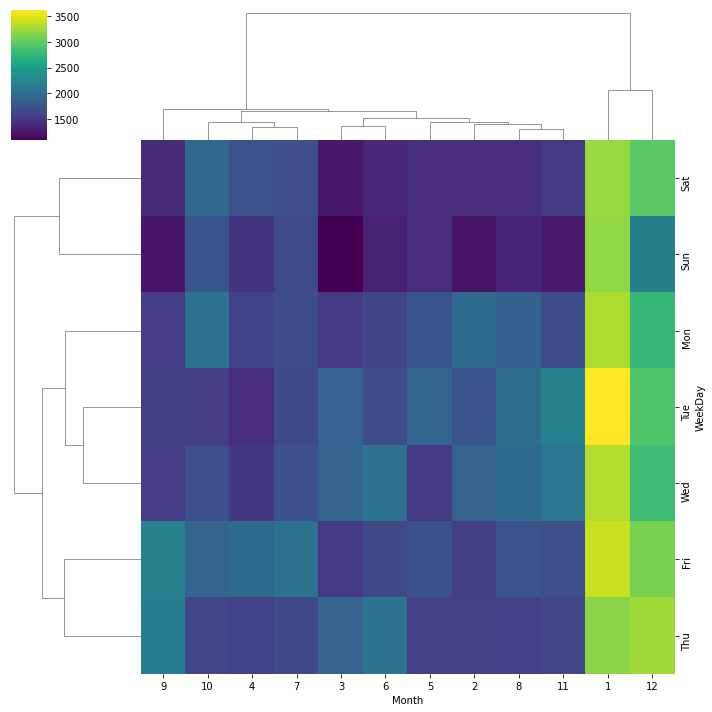

In [37]:
sns.clustermap(months_per_hour,cmap='viridis')

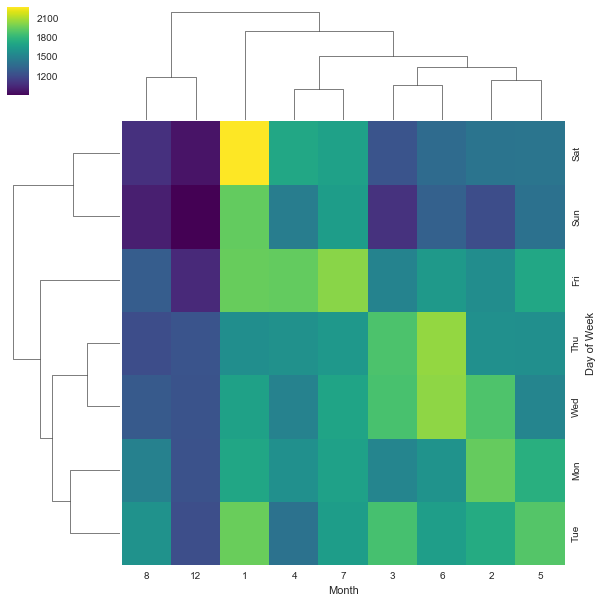

**Continue exploring the Data however you see fit!**
# Great Job!